In [ ]:
import torch
import torchvision
import torchvision.datasets
import torchvision.transforms
import torch.utils.data
import torch.nn
from torchvision import models

import os
from matplotlib import pyplot as plot

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


## Данные

In [ ]:
batch_size = 128

torchvision.datasets.CIFAR10(root='./dataset', train=True, download=True)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f'Classes of dataset: {classes}')

100%|██████████| 170498071/170498071 [00:07<00:00, 22299747.35it/s]


Extracting ./dataset/cifar-10-python.tar.gz to ./dataset
Classes of dataset: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Test and Train

In [ ]:
def get_accuracy(model, data_loader, device):
    tp = 0
    n = 0
    with torch.no_grad():
        for images, labels in data_loader:
            labels = labels.to(device)
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            n += labels.size(0)
            tp += (predicted == labels).sum()
    return tp / n

In [ ]:
import time

def train(model, data_loader, epoches, loss_function, optimizer, device):
    for epoch in range(epoches):
        t0 = time.time()
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            y = model(images)
            loss = loss_function(y, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        t1 = time.time()
        print(f'Epoch[{epoch + 1}]: accuracy = {get_accuracy(model, data_loader, device)}, time = {t1 - t0}')
    print(f'Test accuracy: {get_accuracy(model, data_loader, device)}')

# Mods


In [ ]:
def last_shallow_layer(in_features):

    return torch.nn.Linear(in_features, 10)


def last_deep_layer(in_features):

    return torch.nn.Sequential(
        torch.nn.Linear(in_features, in_features//2),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features//2, 10),
        )

# ResNet18

## Shallow layer

In [ ]:
net = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
transforms = models.ResNet18_Weights.DEFAULT.transforms()

train_dataset = torchvision.datasets.CIFAR10(root='./dataset', train=True, download=False, transform=transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./dataset', train=False, download=False, transform=transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for param in net.parameters():
  param.requires_grad = False

net.fc = last_shallow_layer(512)

learning_rate = 0.001
epoches = 5

net.to(device)

optimizer = torch.optim.Adam(net.fc.parameters(), lr = learning_rate)
loss_function = torch.nn.CrossEntropyLoss()

train(net, train_loader, epoches, loss_function, optimizer, device)
print(f'Validation accuracy: {get_accuracy(net, test_loader, device)}')

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 165MB/s]


Epoch[1]: accuracy = 0.7466399669647217, time = 135.61242175102234
Epoch[2]: accuracy = 0.7731399536132812, time = 129.59951639175415
Epoch[3]: accuracy = 0.7796199917793274, time = 130.10302734375
Epoch[4]: accuracy = 0.7837199568748474, time = 130.16726660728455
Epoch[5]: accuracy = 0.7878199815750122, time = 130.65859532356262
Test accuracy: 0.7876999974250793
Validation accuracy: 0.7742999792098999


In [8]:
print(net)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Deep layers

In [9]:
net = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
transforms = models.ResNet18_Weights.DEFAULT.transforms()

train_dataset = torchvision.datasets.CIFAR10(root='./dataset', train=True, download=False, transform=transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./dataset', train=False, download=False, transform=transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for param in net.parameters():
  param.requires_grad = False

net.fc = last_deep_layer(512)

learning_rate = 0.001
epoches = 5

net.to(device)

optimizer = torch.optim.Adam(net.fc.parameters(), lr = learning_rate)
loss_function = torch.nn.CrossEntropyLoss()

train(net, train_loader, epoches, loss_function, optimizer, device)
print(f'Validation accuracy: {get_accuracy(net, test_loader, device)}')

Epoch[1]: accuracy = 0.7704399824142456, time = 132.62263321876526
Epoch[2]: accuracy = 0.7662000060081482, time = 132.7401602268219
Epoch[3]: accuracy = 0.7854999899864197, time = 131.11594891548157
Epoch[4]: accuracy = 0.7995599508285522, time = 130.85803294181824
Epoch[5]: accuracy = 0.8011399507522583, time = 132.08810782432556
Test accuracy: 0.8023599982261658
Validation accuracy: 0.7800999879837036


In [10]:
print(net)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# DenceNet121

## Shallow layer

In [15]:
dense_net = models.densenet121(weights=models.DenseNet121_Weights.DEFAULT)
transforms = models.DenseNet121_Weights.DEFAULT.transforms()

train_dataset = torchvision.datasets.CIFAR10(root='./dataset', train=True, download=False, transform=transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./dataset', train=False, download=False, transform=transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for param in dense_net.parameters():
  param.requires_grad = False

dense_net.classifier = last_shallow_layer(1024)

learning_rate = 0.001
epoches = 5

dense_net.to(device)

optimizer = torch.optim.Adam(dense_net.classifier.parameters(), lr = learning_rate)
loss_function = torch.nn.CrossEntropyLoss()

train(dense_net, train_loader, epoches, loss_function, optimizer, device)
print(f'Validation accuracy: {get_accuracy(dense_net, test_loader, device)}')

Epoch[1]: accuracy = 0.7750799655914307, time = 175.1893241405487
Epoch[2]: accuracy = 0.7912399768829346, time = 174.56902980804443
Epoch[3]: accuracy = 0.7990599870681763, time = 172.76100730895996
Epoch[4]: accuracy = 0.7984600067138672, time = 172.42804718017578
Epoch[5]: accuracy = 0.8039599657058716, time = 172.2984561920166
Test accuracy: 0.8058399558067322
Validation accuracy: 0.7932999730110168


In [16]:
print(dense_net)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

## Deep layer

In [18]:
net = models.densenet121(weights=models.DenseNet121_Weights.DEFAULT)
transforms = models.DenseNet121_Weights.DEFAULT.transforms()

train_dataset = torchvision.datasets.CIFAR10(root='./dataset', train=True, download=False, transform=transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./dataset', train=False, download=False, transform=transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for param in net.parameters():
  param.requires_grad = False

net.classifier = last_deep_layer(1024)

learning_rate = 0.001
epoches = 5

net.to(device)

optimizer = torch.optim.Adam(net.classifier.parameters(), lr = learning_rate)
loss_function = torch.nn.CrossEntropyLoss()

train(net, train_loader, epoches, loss_function, optimizer, device)
print(f'Validation accuracy: {get_accuracy(net, test_loader, device)}')

Epoch[1]: accuracy = 0.7889399528503418, time = 175.59661269187927
Epoch[2]: accuracy = 0.7890599966049194, time = 175.36195707321167
Epoch[3]: accuracy = 0.8095200061798096, time = 175.4725685119629
Epoch[4]: accuracy = 0.8159999847412109, time = 175.20939993858337
Epoch[5]: accuracy = 0.8270799517631531, time = 175.50420761108398
Test accuracy: 0.8266199827194214
Validation accuracy: 0.796999990940094


In [ ]:
print(net)

# ResNet50


## Shallow layer


In [26]:
net = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
transforms = models.ResNet50_Weights.DEFAULT.transforms()

train_dataset = torchvision.datasets.CIFAR10(root='./dataset', train=True, download=False, transform=transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./dataset', train=False, download=False, transform=transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for param in net.parameters():
  param.requires_grad = False

net.fc = last_shallow_layer(2048)

learning_rate = 0.001
epoches = 5

net.to(device)

optimizer = torch.optim.Adam(net.fc.parameters(), lr = learning_rate)
loss_function = torch.nn.CrossEntropyLoss()

train(net, train_loader, epoches, loss_function, optimizer, device)
print(f'Validation accuracy: {get_accuracy(net, test_loader, device)}')

Epoch[1]: accuracy = 0.7835399508476257, time = 156.91026711463928
Epoch[2]: accuracy = 0.8081799745559692, time = 156.53460931777954
Epoch[3]: accuracy = 0.8220399618148804, time = 156.48160576820374
Epoch[4]: accuracy = 0.8298999667167664, time = 156.10390949249268
Epoch[5]: accuracy = 0.8341000080108643, time = 156.62236499786377
Test accuracy: 0.8333199620246887
Validation accuracy: 0.801099956035614


In [ ]:
print(net)

## Deep layer

In [27]:
net = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
transforms = models.ResNet50_Weights.DEFAULT.transforms()

train_dataset = torchvision.datasets.CIFAR10(root='./dataset', train=True, download=False, transform=transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./dataset', train=False, download=False, transform=transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for param in net.parameters():
  param.requires_grad = False

net.fc = last_deep_layer(2048)

learning_rate = 0.001
epoches = 5

net.to(device)

optimizer = torch.optim.Adam(net.fc.parameters(), lr = learning_rate)
loss_function = torch.nn.CrossEntropyLoss()

train(net, train_loader, epoches, loss_function, optimizer, device)
print(f'Validation accuracy: {get_accuracy(net, test_loader, device)}')

Epoch[1]: accuracy = 0.8162199854850769, time = 157.05709147453308
Epoch[2]: accuracy = 0.8237999677658081, time = 155.89364004135132
Epoch[3]: accuracy = 0.8675400018692017, time = 156.66224694252014
Epoch[4]: accuracy = 0.8746599555015564, time = 156.62921047210693
Epoch[5]: accuracy = 0.8963799476623535, time = 156.40114378929138
Test accuracy: 0.8943399786949158
Validation accuracy: 0.807699978351593


In [ ]:
print(net)

# GoogLeNet

## Shallow layer

In [21]:
net = models.googlenet(weights=models.GoogLeNet_Weights.DEFAULT)
transforms = models.GoogLeNet_Weights.DEFAULT.transforms()

train_dataset = torchvision.datasets.CIFAR10(root='./dataset', train=True, download=False, transform=transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./dataset', train=False, download=False, transform=transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for param in net.parameters():
  param.requires_grad = False

net.fc = last_shallow_layer(1024)

learning_rate = 0.001
epoches = 5

net.to(device)

optimizer = torch.optim.Adam(net.fc.parameters(), lr = learning_rate)
loss_function = torch.nn.CrossEntropyLoss()

train(net, train_loader, epoches, loss_function, optimizer, device)
print(f'Validation accuracy: {get_accuracy(net, test_loader, device)}')

Epoch[1]: accuracy = 0.7416799664497375, time = 135.56433963775635
Epoch[2]: accuracy = 0.7599200010299683, time = 134.6691792011261
Epoch[3]: accuracy = 0.7553399801254272, time = 133.58819270133972
Epoch[4]: accuracy = 0.7693199515342712, time = 134.7606976032257
Epoch[5]: accuracy = 0.7667799592018127, time = 134.60008215904236
Test accuracy: 0.7672799825668335
Validation accuracy: 0.7498999834060669


In [22]:
print(net)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

## Deep layer

In [23]:
net = models.googlenet(weights=models.GoogLeNet_Weights.DEFAULT)
transforms = models.GoogLeNet_Weights.DEFAULT.transforms()

train_dataset = torchvision.datasets.CIFAR10(root='./dataset', train=True, download=False, transform=transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./dataset', train=False, download=False, transform=transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for param in net.parameters():
  param.requires_grad = False

net.fc = last_deep_layer(1024)

learning_rate = 0.001
epoches = 5

net.to(device)

optimizer = torch.optim.Adam(net.fc.parameters(), lr = learning_rate)
loss_function = torch.nn.CrossEntropyLoss()

train(net, train_loader, epoches, loss_function, optimizer, device)
print(f'Validation accuracy: {get_accuracy(net, test_loader, device)}')

Epoch[1]: accuracy = 0.7439199686050415, time = 134.70402359962463
Epoch[2]: accuracy = 0.7352799773216248, time = 134.75833010673523
Epoch[3]: accuracy = 0.7737199664115906, time = 134.8654088973999
Epoch[4]: accuracy = 0.7744199633598328, time = 133.2104630470276
Epoch[5]: accuracy = 0.7785599827766418, time = 134.78286004066467
Test accuracy: 0.779259979724884
Validation accuracy: 0.7603999972343445


In [ ]:
print(net)

<BarContainer object of 9 artists>

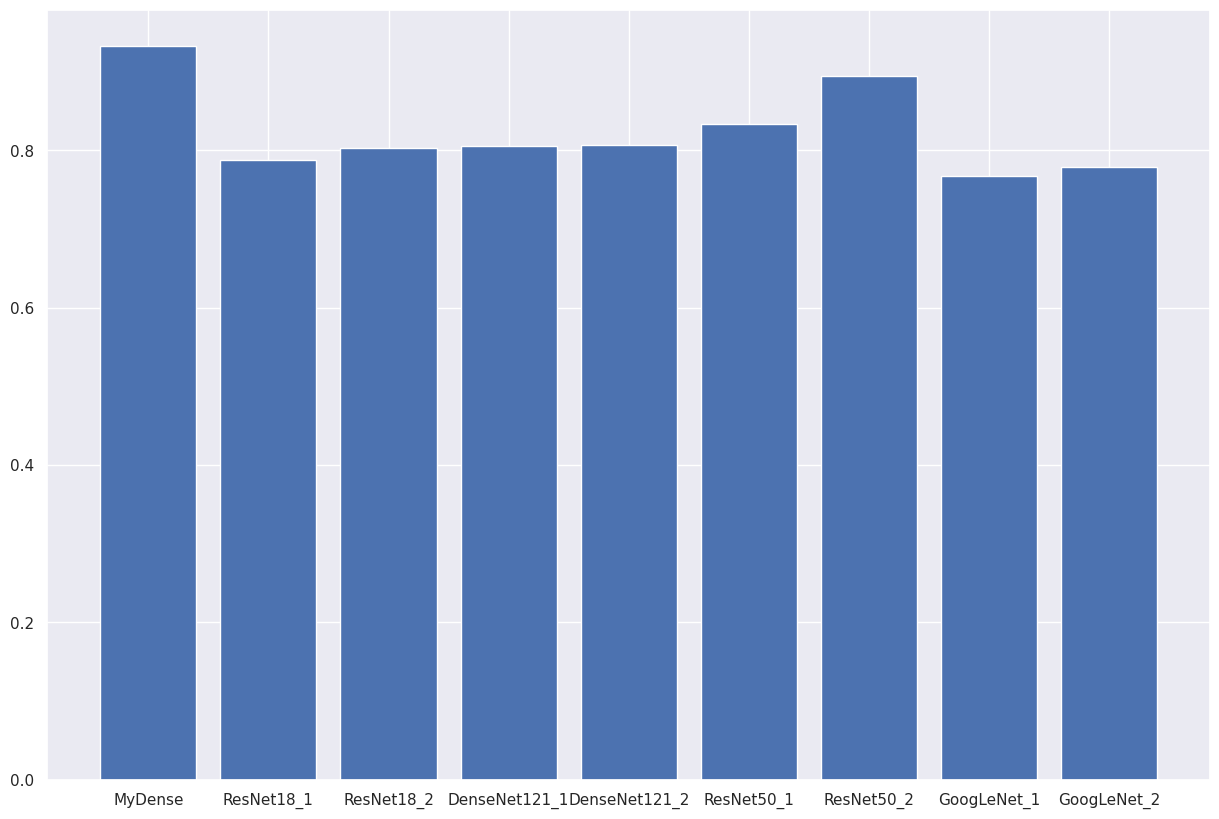

In [54]:
import matplotlib.pyplot as plt

nets = ["MyDense", "ResNet18_1", "ResNet18_2", "DenseNet121_1", "DenseNet121_2", "ResNet50_1", "ResNet50_2", "GoogLeNet_1", "GoogLeNet_2"]
tests = [0.9321, 0.7876, 0.8023, 0.8058, 0.8066, 0.8333, 0.8943, 0.7672, 0.7792]

plt.figure(figsize=(15,10))
plt.bar(nets, tests)